 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [316]:
# Initial imports
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
from pathlib import Path
from datetime import date, datetime

%matplotlib inline
sns.set_theme(style="darkgrid")

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [317]:
# Reading whale returns
whale_file = Path("./Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_file, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [318]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [319]:
# Drop nulls
whale_df = whale_df.dropna()
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [320]:
# Review remaining statiscal data
whale_df.describe(include="all")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
count,1059.000000,1059.000000,1059.000000,1059.000000
mean,0.000179,-0.000203,-0.000081,0.000501
std,0.007842,0.006977,0.010824,0.012831
min,-0.032711,-0.032099,-0.139820,-0.066505
25%,-0.003594,-0.003961,-0.004746,-0.005515
50%,0.000467,0.000000,0.000232,0.000617
75%,0.004292,0.003567,0.005176,0.007516
max,0.042977,0.029338,0.080705,0.061341


In [321]:
# Sort the whale dataframe for further analysis
whale_df.sort_index(inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [322]:
# Reading algorithmic returns
algo_file = Path("./Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_file, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [323]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [324]:
# Drop nulls
algo_df = algo_df.dropna()
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [325]:
# Review remaining statiscal data
algo_df.describe(include="all")

,Algo 1,Algo 2
count,1235.000000,1235.000000
mean,0.000654,0.000341
std,0.007988,0.008466
min,-0.030951,-0.036937
25%,-0.003252,-0.003733
50%,0.000094,0.000581
75%,0.003901,0.005194
max,0.098246,0.083734


In [326]:
# Sort the algorithmic dataframe for future analysis
algo_df.sort_index(inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [327]:
# Reading S&P 500 Closing Prices
sp500_file = Path("./Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_file, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [328]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [329]:
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].str.replace("$", "").astype(float)
sp500_df.dtypes

/home/gadam/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


Close    float64
dtype: object

In [330]:
sp500_df.sort_index(inplace=True)
sp500_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [331]:
# Calculate Daily Returns
sp500_daily_returns = sp500_df.pct_change()

In [332]:
# Drop nulls
sp500_daily_returns.isnull().sum()

Close    1
dtype: int64

In [333]:
sp500_daily_returns = sp500_daily_returns.dropna()
sp500_daily_returns.isnull().sum()

Close    0
dtype: int64

In [334]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns = sp500_daily_returns.rename(columns={"Close": "SP500_Close"})
sp500_daily_returns.sort_index(inplace=True)
sp500_daily_returns.head()

,SP500_Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [335]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_portfolio_df = pd.concat([whale_df, algo_df, sp500_daily_returns], axis="columns", join="inner")
combined_portfolio_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
SP500_Close                    0
dtype: int64

In [336]:
# Remove new null data for a clean dataframe
combined_portfolio_df = combined_portfolio_df.dropna()
combined_portfolio_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
SP500_Close                    0
dtype: int64

In [337]:
# Sort the portfolio dataframe for future analysis
combined_portfolio_df.sort_index(inplace=True)
combined_portfolio_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [338]:
# Get the S&P500 returns for the same period as the whale and algo portfolios
sp500_daily_returns = combined_portfolio_df.drop(
    columns=[
        "SOROS FUND MANAGEMENT LLC", 
        "PAULSON & CO.INC. ", 
        "TIGER GLOBAL MANAGEMENT LLC", 
        "BERKSHIRE HATHAWAY INC",
        "Algo 1",
        "Algo 2"
    ]
)
sp500_daily_returns.head()

,SP500_Close
Date,
2015-03-03,-0.004539
2015-03-04,-0.004389
2015-03-05,0.001196
2015-03-06,-0.014174
2015-03-09,0.003944


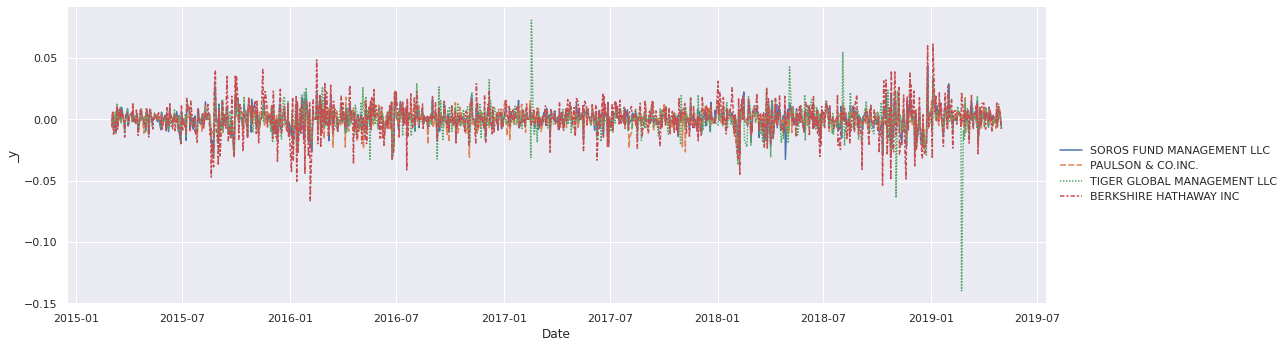

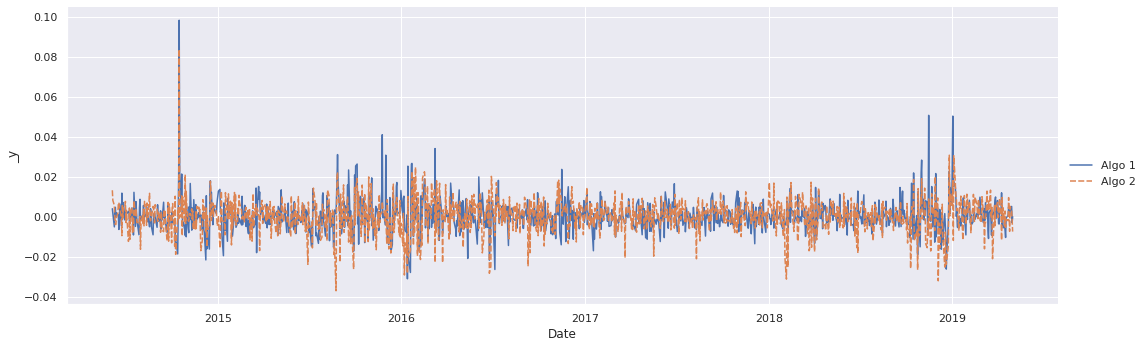

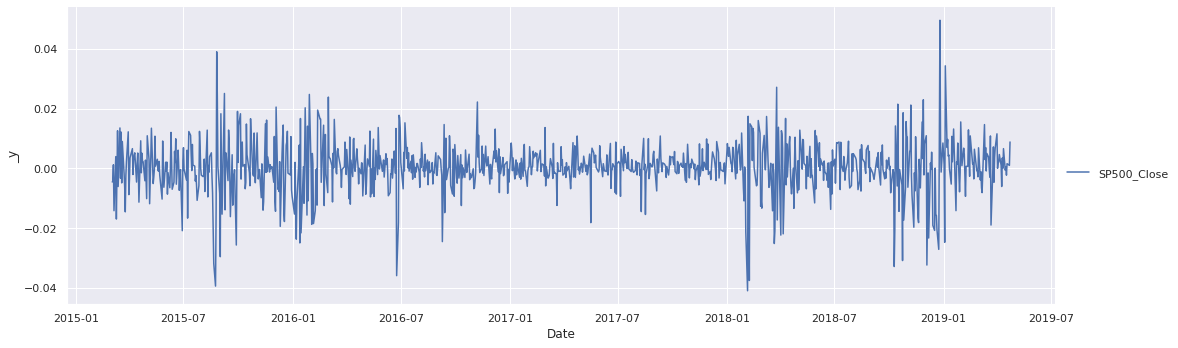

In [339]:
# Plot daily returns of all portfolios

# [df.plot(figsize=(7,6), title="Daily Returns") for df in [whale_df, algo_df, sp500_daily_returns]]
[sns.relplot(data=df, kind="line", aspect=3.0) for df in [whale_df, algo_df, sp500_daily_returns]]

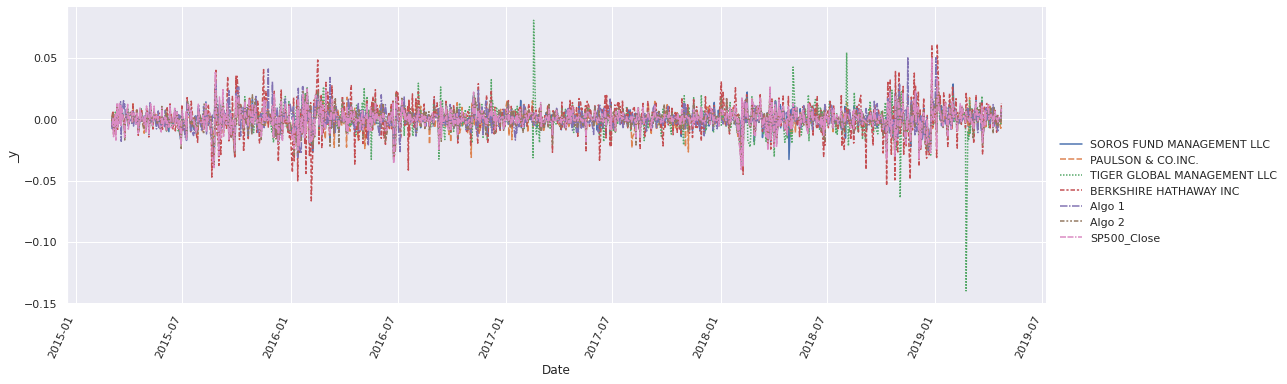

In [340]:
# Plot the combined portfolion retrns dataframe
combined_chart = sns.relplot(data=combined_portfolio_df, kind="line", aspect=3.0)
combined_chart.set_xticklabels(rotation=65, horizontalalignment="right")

#### Calculate and Plot cumulative returns.

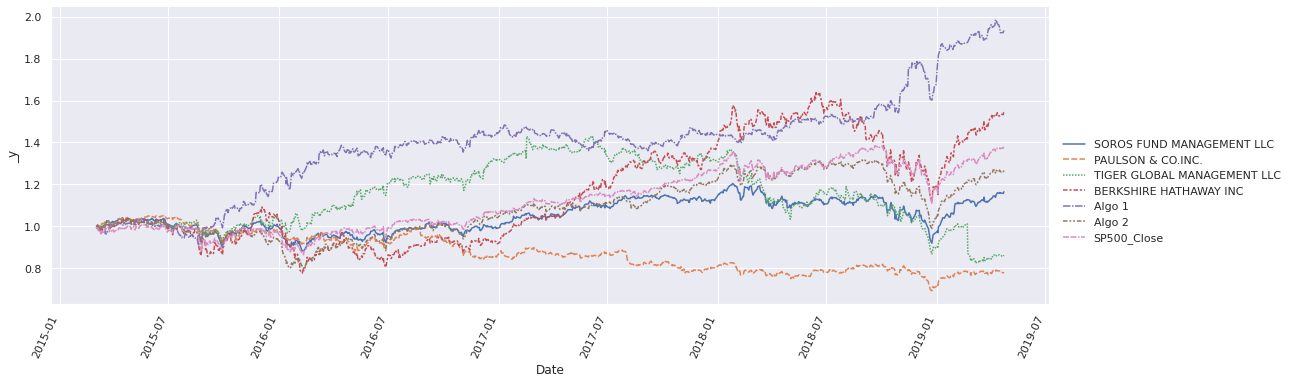

In [341]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_portfolio_df).cumprod()

# Plot cumulative returns
cumulative_chart = sns.relplot(data=cumulative_returns, kind="line", aspect=3.0)
cumulative_chart.set_xticklabels(rotation=65, horizontalalignment="right")


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


[Text(0, 0, 'SOROS FUND MANAGEMENT LLC'),
 Text(1, 0, 'PAULSON & CO.INC. '),
 Text(2, 0, 'TIGER GLOBAL MANAGEMENT LLC'),
 Text(3, 0, 'BERKSHIRE HATHAWAY INC')]

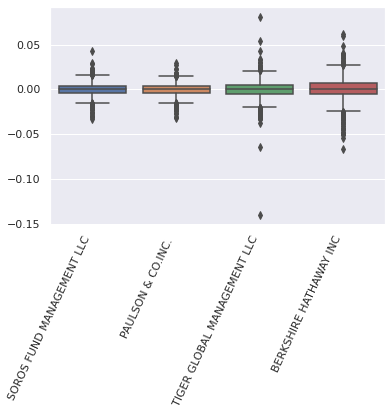

In [342]:
# Box plot to visually show risk
whale_box_chart = sns.boxplot(data=whale_df)
whale_box_chart.set_xticklabels(whale_box_chart.get_xticklabels(), rotation=65, horizontalalignment="right")

[Text(0, 0, 'Algo 1'), Text(1, 0, 'Algo 2')]

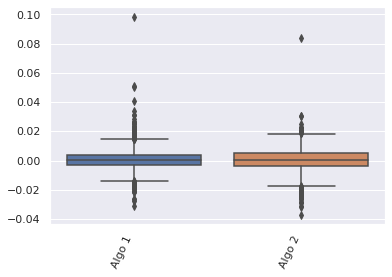

In [343]:
algo_box_chart = sns.boxplot(data=algo_df)
algo_box_chart.set_xticklabels(algo_box_chart.get_xticklabels(), rotation=65, horizontalalignment="right")

<AxesSubplot:>

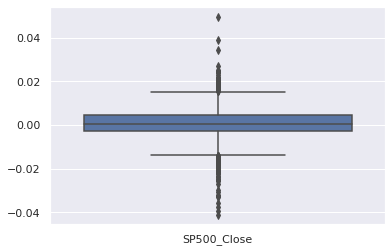

In [344]:
sns.boxplot(data=sp500_daily_returns)

### Calculate Standard Deviations

In [345]:
# Calculate the daily standard of all portfolios
# Whale unweighted SD...
whale_unweighted_sd = whale_df.std()
whale_unweighted_sd

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

In [346]:
# Algorhtmic strategy unweighted SD...
algo_unweighted_sd = algo_df.std()
algo_unweighted_sd

Algo 1    0.007988
Algo 2    0.008466
dtype: float64

In [347]:
# Calculate the daily standard deviations of all portfolios
# Starting with the whale portfolio, I'll calculate the portfolio's returns with an equal amount (25%) in each fund
whale_weights = [0.25, 0.25, 0.25, 0.25]
whale_weighted_returns = whale_df.dot(whale_weights)
whale_weighted_returns.head()

Date
2015-03-03   -0.003328
2015-03-04    0.001788
2015-03-05    0.004293
2015-03-06   -0.008265
2015-03-09    0.002249
dtype: float64

In [348]:

# Starting with the whale portfolio, I'll calculate the portfolio's returns with an equal amount (25%) in each fund
whale_weights = [0.25, 0.25, 0.25, 0.25]
whale_weighted_returns = whale_df.dot(whale_weights)
whale_weighted_returns.head()

Date
2015-03-03   -0.003328
2015-03-04    0.001788
2015-03-05    0.004293
2015-03-06   -0.008265
2015-03-09    0.002249
dtype: float64

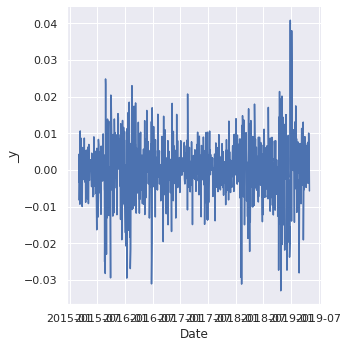

In [349]:
# Plot the weighted whale returns
sns.relplot(data=whale_weighted_returns, kind="line")

In [350]:
# Now calculate the standard deviation from the weighted returns dataframe
whale_std = whale_weighted_returns.std()
whale_std

0.007894995212497506

In [351]:
# The algorithmic portfolio will also use a weighted returns calculation
algo_weights = [0.5, 0.5]
algo_weighted_returns = algo_df.dot(algo_weights)
algo_weighted_returns

Date
2014-06-05    0.008674
2014-06-06    0.005070
2014-06-09    0.000328
2014-06-10    0.001835
2014-06-11    0.000499
                ...   
2019-04-25   -0.003282
2019-04-26    0.004118
2019-04-29    0.004019
2019-04-30   -0.002257
2019-05-01   -0.003632
Length: 1235, dtype: float64

In [352]:
# Calculate the standard deviation from algo's weighted returns
algo_std = algo_weighted_returns.std()
algo_std

0.006752030964420841

In [353]:
# now calculate the S&P 500's standard deviation
sp500_std = sp500_daily_returns.std()
sp500_std

SP500_Close    0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [354]:
# Determine which portfolios are riskier than the S&P using the unweighted returns
# Combine the two portfolios into a single series with standard deviations
combined_unweighted_sd = pd.concat([whale_unweighted_sd, algo_unweighted_sd], axis="rows")
combined_unweighted_sd

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
Algo 1                         0.007988
Algo 2                         0.008466
dtype: float64

In [355]:
# Loop through each stock and compare to the market
for fund, sd in combined_unweighted_sd.iteritems():
    adverb = "less"
    if (sp500_std["SP500_Close"]) > sd:
        adverb = "more"
    print(f"With a standard deviation of {round(sd, 4)}, {fund} is {adverb} risky than the S&P 500 at a standard deviation of {round(sp500_std['SP500_Close'], 4)}")

With a standard deviation of 0.0078, SOROS FUND MANAGEMENT LLC is more risky than the S&P 500 at a standard deviation of 0.0086
With a standard deviation of 0.007, PAULSON & CO.INC.  is more risky than the S&P 500 at a standard deviation of 0.0086
With a standard deviation of 0.0108, TIGER GLOBAL MANAGEMENT LLC is less risky than the S&P 500 at a standard deviation of 0.0086
With a standard deviation of 0.0128, BERKSHIRE HATHAWAY INC is less risky than the S&P 500 at a standard deviation of 0.0086
With a standard deviation of 0.008, Algo 1 is more risky than the S&P 500 at a standard deviation of 0.0086
With a standard deviation of 0.0085, Algo 2 is more risky than the S&P 500 at a standard deviation of 0.0086


In [356]:
# Determine which portfolios are riskier than the S&P 500 using weighted returns
whale_sd = round(whale_std, 4)
algo_sd = round(algo_std, 4)
sp500_sd = round(sp500_std['SP500_Close'], 4)
adverb = False  # This is only used for printing the adverb "also" in the final `if` condition
if (sp500_sd > whale_sd) and (sp500_sd > algo_sd):
    print(f"With standard deviations of {whale_sd} and {algo_sd} respectively, both the whale and algorithmic portfolios are less risky than the S&P 500 at a standdard deviation of {sp500_sd}.")
if whale_sd > sp500_sd:
    print(f"With a standard deviation of {whale_sd}, the whale portfolio is riskier than the S&P 500 at a standard deviation of {sp500_sd}.")
    adverb = True
if algo_sd > sp500_sd:
    print(f"With a standard deviation of {algo_sd}, the algorithmic portfolio is {'also ' if adverb else ''}riskier than the S&P 500 at a standard deviation of {sp500_sd}.")


With standard deviations of 0.0079 and 0.0068 respectively, both the whale and algorithmic portfolios are less risky than the S&P 500 at a standdard deviation of 0.0086.


### Calculate the Annualized Standard Deviation

In [357]:
# Calculate the annualised standard deviation for unweighted returns (252 trading days)
whale_unweighted_volatility = whale_unweighted_sd * np.sqrt(252)
whale_unweighted_volatility

SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
dtype: float64

In [358]:
algo_unweighted_volatility = algo_unweighted_sd * np.sqrt(252)
algo_unweighted_volatility

Algo 1    0.126801
Algo 2    0.134401
dtype: float64

In [359]:
# Calculate the annualized standard deviation (252 trading days)
whale_volatility = whale_std * np.sqrt(252)
algo_volatility = algo_std * np.sqrt(252)
sp500_volatility = sp500_std * np.sqrt(252)

In [360]:
whale_volatility

0.12532916360588367

In [361]:
algo_volatility

0.10718516865879092

In [362]:
sp500_volatility

SP500_Close    0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

Text(0.5, 1.0, '21-Day Rolling Standard Deviation using unweighted returns')

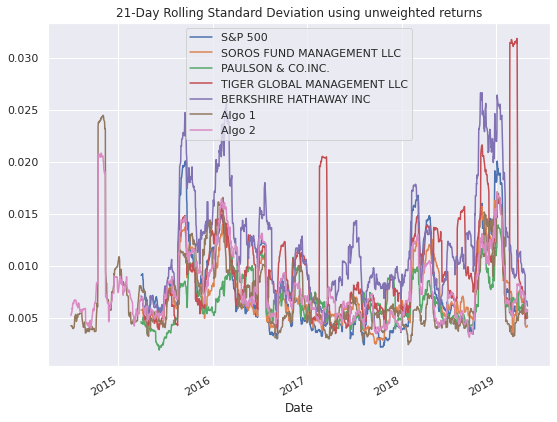

In [363]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window and unweighted portfolios
whale_rolling_unweighted_sd = whale_df.rolling(21).std()
algo_rolling_unweighted_sd = algo_df.rolling(21).std()
sp500_rolling_sd = sp500_daily_returns.rolling(21).std()

# Plot the rolling standard deviation for unweighted portfolios, overlaying each on the same chart and add a legend
sp500_ax = sp500_rolling_sd.plot()
whale_unweighted_ax = whale_rolling_unweighted_sd.plot(ax=sp500_ax)
algo_unweighted_ax = algo_rolling_unweighted_sd.plot(ax=whale_unweighted_ax, figsize=(9,7))
legend = ["S&P 500"] + [fund for fund, value in whale_unweighted_sd.iteritems()] + [algo for algo, value in algo_unweighted_sd.iteritems()]
algo_unweighted_ax.legend(legend)
algo_unweighted_ax.set_title("21-Day Rolling Standard Deviation using unweighted returns")

Text(0.5, 1.0, '21-Day Rolling Standard Deviation using Weighted Returns')

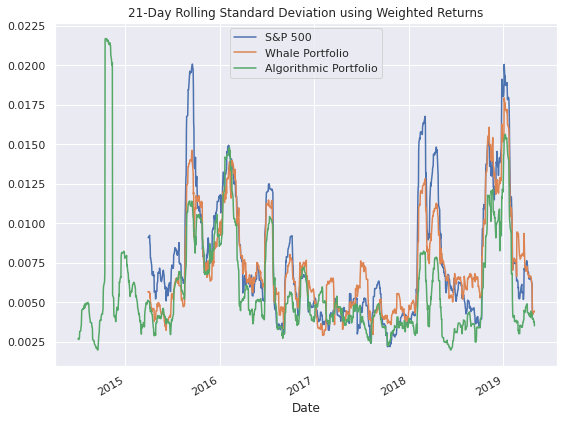

In [364]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

whale_rolling_sd = whale_weighted_returns.rolling(21).std()
algo_rolling_sd = algo_weighted_returns.rolling(21).std()

# Plot the rolling standard deviation, overlaying each on the same chart and add a legend
sp500_ax = sp500_rolling_sd.plot()
whale_ax = whale_rolling_sd.plot(ax=sp500_ax)
algo_ax = algo_rolling_sd.plot(ax=whale_ax, figsize=(9,7))
algo_ax.legend(["S&P 500", "Whale Portfolio", "Algorithmic Portfolio"])
algo_ax.set_title("21-Day Rolling Standard Deviation using Weighted Returns")

### Calculate and plot the correlation

In [365]:
# Calculate the correlation
# Combine whale and S&P 500 first
whale_sp500 = pd.concat([whale_weighted_returns, sp500_daily_returns], axis="columns", join="inner")
whale_sp500 = whale_sp500.rename(columns={0 : "Whale", "SP500_Close" : "SP500"})
whale_sp500.head()


,Whale,SP500
Date,,
2015-03-03,-0.003328,-0.004539
2015-03-04,0.001788,-0.004389
2015-03-05,0.004293,0.001196
2015-03-06,-0.008265,-0.014174
2015-03-09,0.002249,0.003944


In [366]:

# Calculate correlation
whale_sp500_correlation = whale_sp500.corr()
whale_sp500_correlation

,Whale,SP500
Whale,1.000000,0.875364
SP500,0.875364,1.000000


<AxesSubplot:>

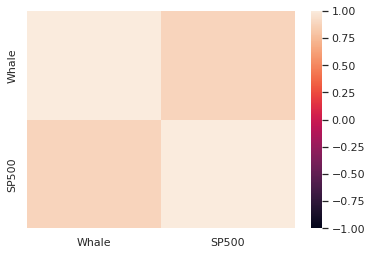

In [367]:
# Display the correlation matrix
sns.heatmap(whale_sp500_correlation, vmin=-1, vmax=1)

In [368]:
# Combine algorithmic portfolio and S&P 500 first
algo_sp500 = pd.concat([algo_weighted_returns, sp500_daily_returns], axis="columns", join="inner")
algo_sp500 = algo_sp500.rename(columns={0 : "Algo", "SP500_Close" : "SP500"})
algo_sp500.head()


,Algo,SP500
Date,,
2015-03-03,-0.001446,-0.004539
2015-03-04,-0.003086,-0.004389
2015-03-05,0.001684,0.001196
2015-03-06,-0.008209,-0.014174
2015-03-09,-0.002072,0.003944


In [369]:

# Calculate correlation
algo_sp500_correlation = algo_sp500.corr()
algo_sp500_correlation

,Algo,SP500
Algo,1.000000,0.725047
SP500,0.725047,1.000000


<AxesSubplot:>

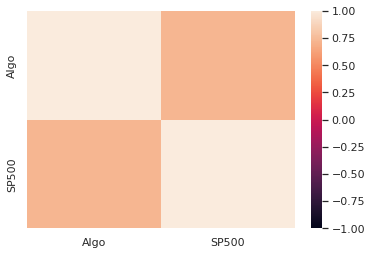

In [370]:
# Display the correlation matrix
sns.heatmap(algo_sp500_correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [371]:
# Calculate covariance of a single portfolio
algo_covariance = algo_sp500["Algo"].cov(algo_sp500["SP500"])
algo_covariance

3.9748536866541335e-05

In [372]:
# Calculate variance of S&P 500
sp500_variance = algo_sp500["SP500"].var()
sp500_variance

7.316632424648712e-05

In [373]:
# Computing beta
algo_beta = algo_covariance / sp500_variance
algo_beta

0.543262727435016

<AxesSubplot:title={'center':'Rolling 21-Day Covariance of Algorithmic returns vs S&P 500 Returns'}, xlabel='Date'>

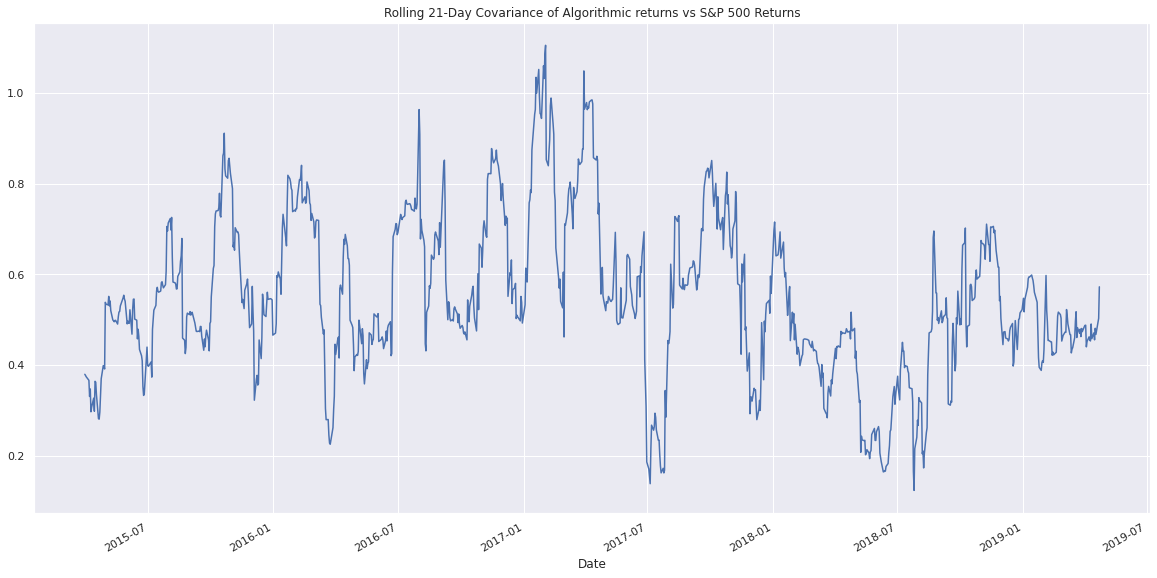

In [374]:
# Plot beta trend
algo_rolling_covariance = algo_sp500["Algo"].rolling(window=21).cov(algo_sp500["SP500"])
sp500_rolling_variance = algo_sp500["SP500"].rolling(window=21).var()
algo_rolling_beta = algo_rolling_covariance / sp500_rolling_variance
algo_rolling_beta.plot(figsize=(20, 10), title="Rolling 21-Day Covariance of Algorithmic returns vs S&P 500 Returns")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [375]:
# Use `ewm` to calculate the rolling window for the whale portfolio using standard deviation
whale_ewm = whale_weighted_returns.ewm(halflife="21 days", times=pd.DatetimeIndex(whale_weighted_returns)).std()
whale_ewm.head()

Date
2015-03-03         NaN
2015-03-04    0.003617
2015-03-05    0.003458
2015-03-06    0.007168
2015-03-09    0.005972
dtype: float64

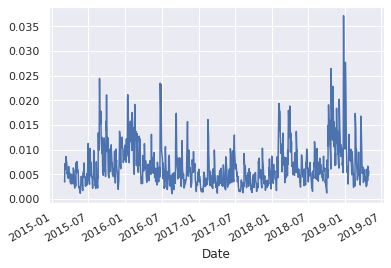

In [376]:
whale_ewm_chart = whale_ewm.plot()

In [377]:
# Use `ewm` to calculate the rolling window for the algo portfolio using standard deviation
algo_ewm = algo_weighted_returns.ewm(halflife="21 days", times=pd.DatetimeIndex(algo_weighted_returns)).std()
algo_ewm.head()

Date
2014-06-05         NaN
2014-06-06    0.002548
2014-06-09    0.004160
2014-06-10    0.002801
2014-06-11    0.002224
dtype: float64

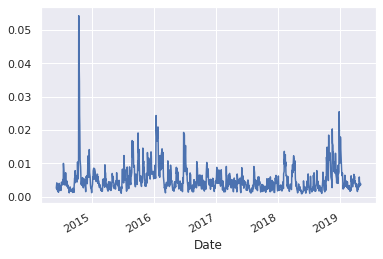

In [378]:
algo_ewm_chart = algo_ewm.plot()

In [379]:
# Use `ewm` to calculate the rolling window for the S&P 500 using standard deviation
sp500_ewm = sp500_daily_returns.ewm(halflife="21 days", times=pd.DatetimeIndex(sp500_daily_returns)).std()
sp500_ewm.head()

,SP500_Close
Date,
2015-03-03,NaN
2015-03-04,0.000106
2015-03-05,0.003689
2015-03-06,0.008542
2015-03-09,0.009512


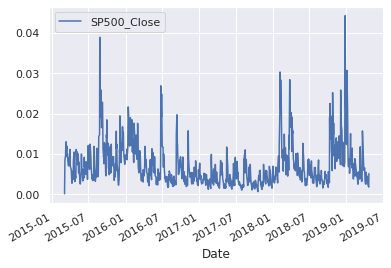

In [380]:
sp500_ewm_chart = sp500_ewm.plot()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [381]:
# Annualized Sharpe Ratios (using S&P500 as the risk-free rate)
sharpe_ratios = ((combined_portfolio_df.mean() - combined_portfolio_df["SP500_Close"].mean()) * 252) / (combined_portfolio_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC     -0.345907
PAULSON & CO.INC.             -1.273125
TIGER GLOBAL MANAGEMENT LLC   -0.630067
BERKSHIRE HATHAWAY INC         0.192576
Algo 1                         0.650964
Algo 2                        -0.163336
SP500_Close                    0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

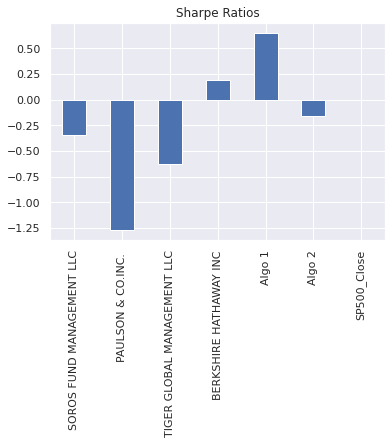

In [382]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

The only stock in the whale portfolio that achieved a positive Sharpe ratio is the `Berkshire Hathaway Inc` stock, with all the remaining stocks earning negative ratios.  In comparison, `Algo 1` achieved the best Sharpe ratio of all the stocks in both portfolios with `Algo 2` in negative territory but to a smaller extent.  On the face of it, the altorithmic strategies appear to have outperformed the whale portfolios and the market.  

I will also perform the anlysis using weighted returns below.

In [383]:
# Combine the weighted returns of the whale and algo portfolios with the S&P 500
weighted_combined_returns = pd.concat([whale_weighted_returns, algo_weighted_returns, sp500_daily_returns], axis="columns", join="inner")
weighted_combined_returns.head()

,0,1,SP500_Close
Date,,,
2015-03-03,-0.003328,-0.001446,-0.004539
2015-03-04,0.001788,-0.003086,-0.004389
2015-03-05,0.004293,0.001684,0.001196
2015-03-06,-0.008265,-0.008209,-0.014174
2015-03-09,0.002249,-0.002072,0.003944


In [384]:
# Rename the columns for whale and algo
weighted_combined_returns = weighted_combined_returns.rename(
    columns={
        0: "Whale",
        1: "Algo"
    }
)
weighted_combined_returns.head()

,Whale,Algo,SP500_Close
Date,,,
2015-03-03,-0.003328,-0.001446,-0.004539
2015-03-04,0.001788,-0.003086,-0.004389
2015-03-05,0.004293,0.001684,0.001196
2015-03-06,-0.008265,-0.008209,-0.014174
2015-03-09,0.002249,-0.002072,0.003944


In [385]:
# Calcalate the annualised Sharpe Ratios for the weighted portfolios (using S&P500 as the risk-free rate)
weighted_sharpe_ratios = ((weighted_combined_returns.mean() - weighted_combined_returns["SP500_Close"].mean()) * 252) / (weighted_combined_returns.std() * np.sqrt(252))
weighted_sharpe_ratios

Whale         -0.504918
Algo           0.280684
SP500_Close    0.000000
dtype: float64

<AxesSubplot:title={'center':'Weighted Sharpe Ratios'}>

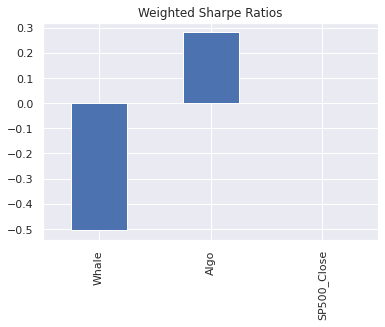

In [386]:
# Visualize the wighted sharpe ratios as a bar plot
weighted_sharpe_ratios.plot(kind="bar", title="Weighted Sharpe Ratios")

As clearly shown in the figure above, when viewed as portfolios, the `algorithmic` portfolio outperformed the `whale` portfolio regardless of the membership of the `Berkshire Hathaway Inc` stock in the `whale` portfolio.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [387]:
# Get period for the combined returns
earliest_date = combined_portfolio_df.index.min().to_pydatetime()
latest_date = combined_portfolio_df.index.max().to_pydatetime()

In [388]:
earliest_date

datetime.datetime(2015, 3, 3, 0, 0)

In [389]:
latest_date

datetime.datetime(2019, 4, 23, 0, 0)

In [314]:
# Reading data from 1st stock
boeing_file = Path("./Resources/my_portfolio/boeing.csv")
boeing_df = pd.read_csv(boeing_file, index_col="Date", infer_datetime_format=True, parse_dates=True)
boeing_df.index = boeing_df.index.date  # Convert the index from timetamp to just date
boeing_df = boeing_df.rename(columns={"Close" : "Boeing"}) # Rename the `Close` column to the name of the stock
boeing_df.head()

,Boeing
2015-03-03,155.57
2015-03-04,154.35
2015-03-05,154.47
2015-03-06,153.12
2015-03-09,154.75


In [390]:
# Reading data from 2nd stock
eli_file = Path("./Resources/my_portfolio/eli_lilly.csv")
eli_df = pd.read_csv(eli_file, index_col="Date", infer_datetime_format=True, parse_dates=True)
eli_df.index = eli_df.index.date  # Convert the index from timetamp to just date
eli_df = eli_df.rename(columns={"Close" : "Eli Lilly"}) # Rename the `Close` column to the name of the stock
eli_df.head()

,Eli Lilly
2015-03-03,70.37
2015-03-04,70.65
2015-03-05,70.59
2015-03-06,68.41
2015-03-09,69.58


In [391]:
# Reading data from 3rd stock
hal_file = Path("./Resources/my_portfolio/haliburton.csv")
hal_df = pd.read_csv(hal_file, index_col="Date", infer_datetime_format=True, parse_dates=True)
hal_df.index = hal_df.index.date  # Convert the index from timetamp to just date
hal_df = hal_df.rename(columns={"Close" : "Haliburton"}) # Rename the `Close` column to the name of the stock
hal_df.head()

,Haliburton
2015-03-03,43.11
2015-03-04,43.07
2015-03-05,42.94
2015-03-06,42.38
2015-03-09,42.04


In [393]:
# Reading data from the 4th stock
sbc_file = Path("./Resources/my_portfolio/sbc.csv")
sbc_df = pd.read_csv(sbc_file, index_col="Date", infer_datetime_format=True, parse_dates=True)
sbc_df.index = sbc_df.index.date  # Convert the index from timestamp to just date
sbc_df = sbc_df.rename(columns={"Close" : "SBC"}) # Rename the `Close` column to the name of the stock
sbc_df.head()

,SBC
2015-03-03,8.90
2015-03-04,8.76
2015-03-05,8.78
2015-03-06,8.73
2015-03-09,8.73


In [394]:
# Combine all stocks in a single DataFrame
my_portfolio_df = pd.concat([boeing_df, eli_df, hal_df, sbc_df], axis="columns", join="inner")
my_portfolio_df.head()

,Boeing,Eli Lilly,Haliburton,SBC
2015-03-03,155.57,70.37,43.11,8.90
2015-03-04,154.35,70.65,43.07,8.76
2015-03-05,154.47,70.59,42.94,8.78
2015-03-06,153.12,68.41,42.38,8.73
2015-03-09,154.75,69.58,42.04,8.73


In [396]:
# Reset Date index
## Already done as I created the data frames but I will sort it instead
my_portfolio_df.sort_index(inplace=True)
my_portfolio_df.head()

,Boeing,Eli Lilly,Haliburton,SBC
2015-03-03,155.57,70.37,43.11,8.90
2015-03-04,154.35,70.65,43.07,8.76
2015-03-05,154.47,70.59,42.94,8.78
2015-03-06,153.12,68.41,42.38,8.73
2015-03-09,154.75,69.58,42.04,8.73


In [ ]:
# Reorganize portfolio data by having a column per symbol
## Already done as I created the dataframes

In [397]:
# Calculate daily returns
my_portfolio_returns = my_portfolio_df.pct_change()
my_portfolio_returns.head()

,Boeing,Eli Lilly,Haliburton,SBC
2015-03-03,NaN,NaN,NaN,NaN
2015-03-04,-0.007842,0.003979,-0.000928,-0.015730
2015-03-05,0.000777,-0.000849,-0.003018,0.002283
2015-03-06,-0.008740,-0.030883,-0.013041,-0.005695
2015-03-09,0.010645,0.017103,-0.008023,0.000000


In [399]:
# Drop NAs
my_portfolio_returns = my_portfolio_returns.dropna()
# Display sample data
my_portfolio_returns.head()

,Boeing,Eli Lilly,Haliburton,SBC
2015-03-04,-0.007842,0.003979,-0.000928,-0.015730
2015-03-05,0.000777,-0.000849,-0.003018,0.002283
2015-03-06,-0.008740,-0.030883,-0.013041,-0.005695
2015-03-09,0.010645,0.017103,-0.008023,0.000000
2015-03-10,-0.015057,-0.011498,-0.017364,-0.033219


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [401]:
# Set weights
# Since I have 4 stocks, I'll use 25% weightings
weights = [1/4, 1/4, 1/4, 1/4]
my_portfolio_weighted_returns = my_portfolio_returns.dot(weights)
my_portfolio_weighted_returns.head()

2015-03-04   -0.005130
2015-03-05   -0.000202
2015-03-06   -0.014590
2015-03-09    0.004931
2015-03-10   -0.019284
dtype: float64

In [404]:
type(my_portfolio_weighted_returns)

pandas.core.series.Series

In [ ]:
# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!